### Import Necessary Packages

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

### Preparing Independent and Dependent Features

In [2]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [4]:
X.shape

(6, 3)

### Preprocessing for LSTM Model

##### Reshaping from [samples, timesteps] into [samples, timesteps, features] for LSTM

In [5]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [6]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [7]:
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 32889.4492
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 32779.5117
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 32661.8516
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 32531.3066
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 32396.2754
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 32262.2246
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 32139.3750
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 32020.2344
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 31903.7988
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 31784.8496
Epoch 11/300
1/1 [==============================] - 0s 4ms/step - loss: 31652.8516
Epoch 12/300
1/1 [==============================] - 0s 4ms/step - loss: 31512.0156
Epoch 13/300
1

1/1 [==============================] - 0s 4ms/step - loss: 22.7029
Epoch 102/300
1/1 [==============================] - 0s 4ms/step - loss: 21.2934
Epoch 103/300
1/1 [==============================] - 0s 3ms/step - loss: 20.2675
Epoch 104/300
1/1 [==============================] - 0s 4ms/step - loss: 19.6571
Epoch 105/300
1/1 [==============================] - 0s 4ms/step - loss: 19.4349
Epoch 106/300
1/1 [==============================] - 0s 3ms/step - loss: 19.5279
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 19.8356
Epoch 108/300
1/1 [==============================] - 0s 3ms/step - loss: 20.2482
Epoch 109/300
1/1 [==============================] - 0s 3ms/step - loss: 20.6636
Epoch 110/300
1/1 [==============================] - 0s 3ms/step - loss: 20.9994
Epoch 111/300
1/1 [==============================] - 0s 4ms/step - loss: 21.2015
Epoch 112/300
1/1 [==============================] - 0s 4ms/step - loss: 21.2453
Epoch 113/300
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 5.0766
Epoch 203/300
1/1 [==============================] - 0s 4ms/step - loss: 5.1037
Epoch 204/300
1/1 [==============================] - 0s 5ms/step - loss: 5.0088
Epoch 205/300
1/1 [==============================] - 0s 4ms/step - loss: 4.9438
Epoch 206/300
1/1 [==============================] - 0s 4ms/step - loss: 4.9769
Epoch 207/300
1/1 [==============================] - 0s 7ms/step - loss: 4.8652
Epoch 208/300
1/1 [==============================] - 0s 4ms/step - loss: 4.8535
Epoch 209/300
1/1 [==============================] - 0s 4ms/step - loss: 4.8290
Epoch 210/300
1/1 [==============================] - 0s 4ms/step - loss: 4.7407
Epoch 211/300
1/1 [==============================] - 0s 4ms/step - loss: 4.7429
Epoch 212/300
1/1 [==============================] - 0s 4ms/step - loss: 4.6847
Epoch 213/300
1/1 [==============================] - 0s 3ms/step - loss: 4.6648
Epoch 214/300
1/1 [==============================] - 0

### Predicting For the next 10 data

In [10]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.337]
1 day input [196.         210.         225.33700562]
1 day output [[236.78693]]
2 day input [210.         225.33700562 236.78692627]
2 day output [[252.00386]]
3 day input [225.337   236.78693 252.00386]
3 day output [[267.39163]]
4 day input [236.78693 252.00386 267.39163]
4 day output [[281.41418]]
5 day input [252.00386 267.39163 281.41418]
5 day output [[298.13028]]
6 day input [267.39163 281.41418 298.13028]
6 day output [[314.9]]
7 day input [281.41418 298.13028 314.9    ]
7 day output [[331.68707]]
8 day input [298.13028 314.9     331.68707]
8 day output [[350.49442]]
9 day input [314.9     331.68707 350.49442]
9 day output [[369.64023]]
[225.337, 236.78693, 252.00386, 267.39163, 281.41418, 298.13028, 314.9, 331.68707, 350.49442, 369.64023]


### Visualizing Output

In [11]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

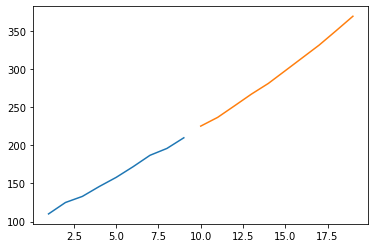

In [12]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
